In [4]:
%matplotlib inline
import warc
from urllib.parse import urlparse
import matplotlib.pyplot as plt
import collections

In [2]:
WARC_FILE = "CC-MAIN-20140305060715-00099-ip-10-183-142-35.ec2.internal.warc"

In [24]:
domains_counter = collections.Counter()
with warc.open(WARC_FILE) as f:
    for record in f:
        if 'WARC-Target-URI' not in record:
            continue
        else:
            host_with_port = urlparse(record['WARC-Target-URI']).netloc
            host = host_with_port.split(':')[0]
            domain = host.split('.')[-1]
            domains_counter.update([domain])

In [35]:
common = dict(domains_counter.most_common(10))
domains = list(common.keys())
total = sum(common.values())
shares = [common[domain]/total for domain in domains]

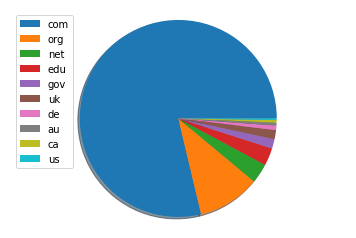

In [48]:
fig, ax = plt.subplots()
patches, texts = ax.pie(shares, shadow=True, radius=1)
ax.axis('equal')
plt.legend(patches, domains, loc='upper left')
plt.savefig('foo.png')